## Laptop Price Predictor

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Importing dataset
df = pd.read_csv("./Downloads/Laptop Price Predictor/laptop_data.csv")
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


## Basic Data Analysis

In [3]:
df.shape

(1303, 12)

In [4]:
#Check for missing values and data types of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
#Check for any duplicate row
df.duplicated().sum()

np.int64(0)

## EDA and Feature Engineering

In [6]:
df = df.drop('Unnamed: 0', axis = 'columns')
df.shape

(1303, 11)

In [7]:
#Removing string GB and kg from respective column
df['Ram'] = df['Ram'].str.replace('GB', '')
df['Weight'] = df['Weight'].str.replace('kg', '')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [8]:
#Changing data type of column
df['Ram'] = df['Ram'].astype('int64')
df['Weight'] = df['Weight'].astype('float64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int64  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float64
 10  Price             1303 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 112.1+ KB


C:\Users\HP\AppData\Local\Temp\ipykernel_156008\834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

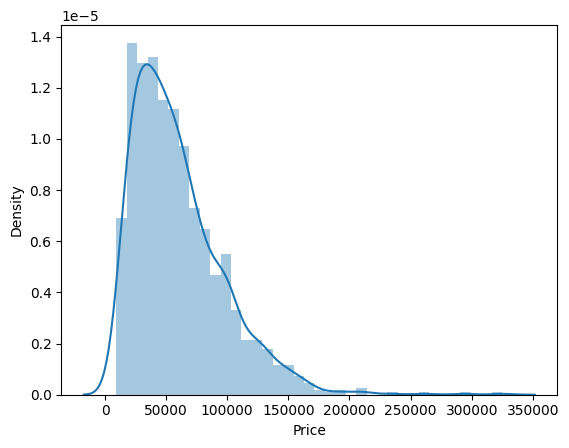

In [9]:
sns.distplot(df['Price'])

<Axes: xlabel='Company'>

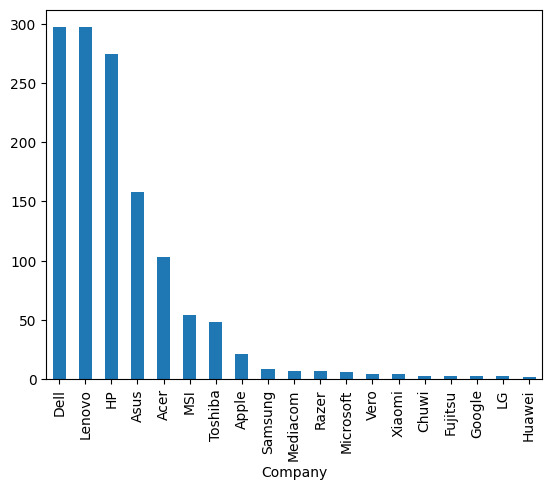

In [10]:
df['Company'].value_counts().plot(kind = 'bar')

In [11]:
df = df[~(df['Company'] == 'Huawei')]
df.shape

(1301, 11)

In [12]:
df['Company'].value_counts()

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Name: count, dtype: int64

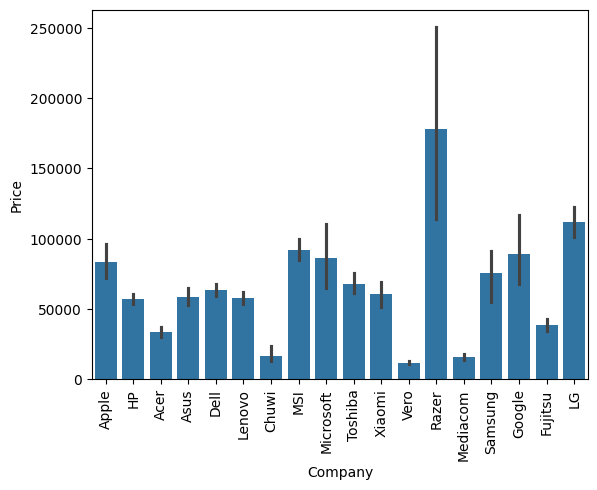

In [13]:
sns.barplot(x = df['Company'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

<Axes: xlabel='TypeName'>

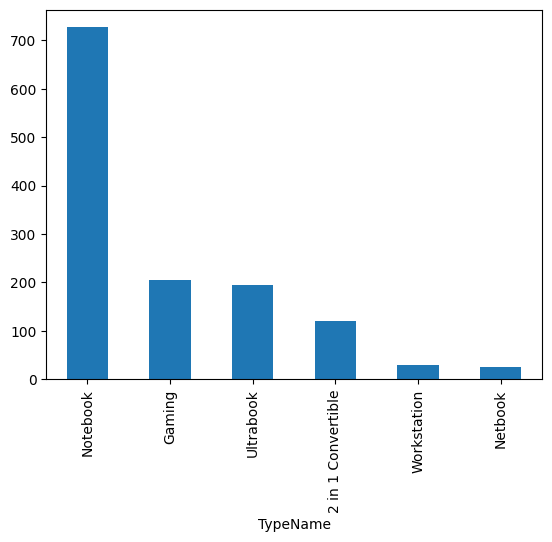

In [14]:
df['TypeName'].value_counts().plot(kind = 'bar')

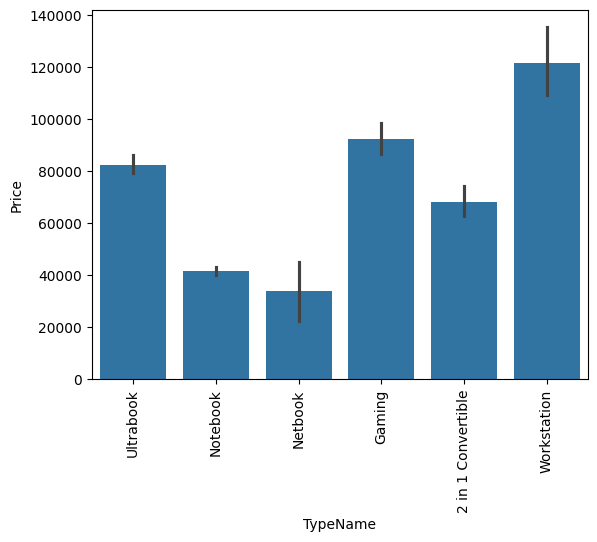

In [15]:
sns.barplot(x = df['TypeName'], y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_156008\1439577752.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Inches'])


<Axes: xlabel='Inches', ylabel='Density'>

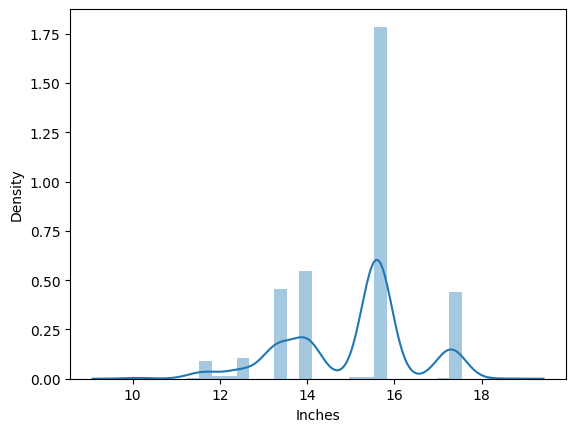

In [16]:
sns.distplot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

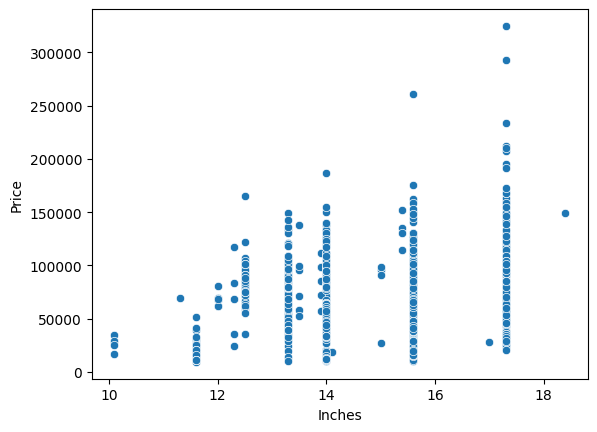

In [17]:
sns.scatterplot(x = df['Inches'], y = df['Price'])

In [18]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
Touchscreen 2560x1440                              7
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2304x1440                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2256x1504                              6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Touchscreen 2560x14

In [19]:
# Marking which row has touchscreen display in a new column with binary values
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x: 1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
30,Chuwi,Notebook,15.6,Full HD 1920x1080,Intel Atom x5-Z8300 1.44GHz,4,64GB Flash Storage,Intel HD Graphics,Windows 10,1.89,13053.0672,0
1225,Asus,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,4,1TB HDD,Intel HD Graphics 405,Windows 10,2.65,16463.5200,0
193,Lenovo,Notebook,17.3,1600x900,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Nvidia GeForce MX150,No OS,2.80,37189.4400,0
1045,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD + 500GB HDD,Intel HD Graphics 520,Windows 10,1.84,112065.9552,0
887,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,12,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,72988.2720,0


In [20]:
df['Touchscreen'].value_counts()

Touchscreen
0    1109
1     192
Name: count, dtype: int64

<Axes: xlabel='Touchscreen', ylabel='Price'>

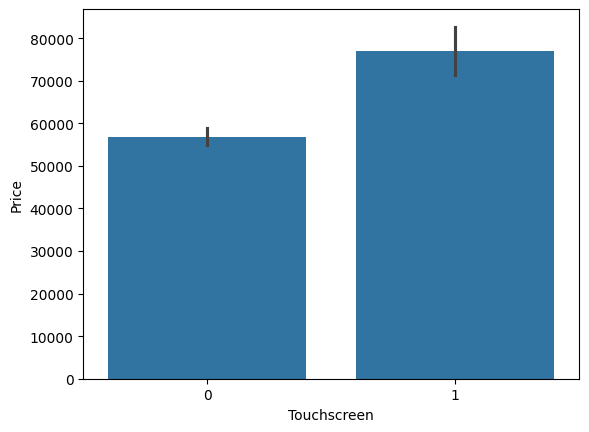

In [21]:
sns.barplot(x = df['Touchscreen'], y = df['Price'])

In [22]:
# Marking which row has IPS Panel display in a new column with binary values
df['IPS Panel'] = df['ScreenResolution'].apply(lambda x: 1 if 'IPS' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel
1146,HP,Ultrabook,12.5,Full HD 1920x1080,Intel Core i7 6500U 2.50GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,122381.496,0,0
1197,Asus,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.30,114552.000,0,1
363,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,Intel HD Graphics 620,Windows 10,1.86,34045.920,0,0
390,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,55357.920,0,0
44,Dell,2 in 1 Convertible,17.3,Full HD / Touchscreen 1920x1080,Intel Core i5 8250U 1.6GHz,12,1TB HDD,Nvidia GeForce 150MX,Windows 10,2.77,53226.720,1,0


In [23]:
df.shape

(1301, 13)

In [24]:
df['IPS Panel'].value_counts()

IPS Panel
0    938
1    363
Name: count, dtype: int64

<Axes: xlabel='IPS Panel', ylabel='Price'>

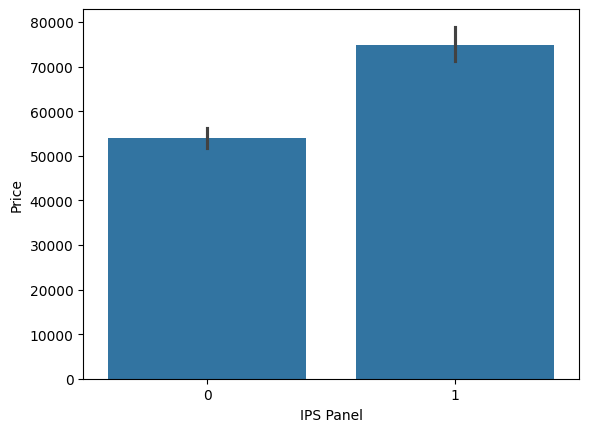

In [25]:
sns.barplot(x = df['IPS Panel'], y = df['Price'])

In [26]:
# Extracting x and y pixels values from Screen Resolution
X_Res = []
Y_Res = []

def resolution_extractor(x):
    tokens = str(x).split(' ')
    lastToken = tokens[len(tokens) - 1]
    XYTokens = lastToken.split('x')
    X_Res.append(int(XYTokens[0]))
    Y_Res.append(int(XYTokens[1]))
    return

In [27]:
df['ScreenResolution'].apply(resolution_extractor)

0       None
1       None
2       None
3       None
4       None
        ... 
1298    None
1299    None
1300    None
1301    None
1302    None
Name: ScreenResolution, Length: 1301, dtype: object

In [28]:
# Making new column with x and y pixels
df['X_Res'] = X_Res
df['Y_Res'] = Y_Res

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_Res,Y_Res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [30]:
df.shape

(1301, 15)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1301 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1301 non-null   object 
 1   TypeName          1301 non-null   object 
 2   Inches            1301 non-null   float64
 3   ScreenResolution  1301 non-null   object 
 4   Cpu               1301 non-null   object 
 5   Ram               1301 non-null   int64  
 6   Memory            1301 non-null   object 
 7   Gpu               1301 non-null   object 
 8   OpSys             1301 non-null   object 
 9   Weight            1301 non-null   float64
 10  Price             1301 non-null   float64
 11  Touchscreen       1301 non-null   int64  
 12  IPS Panel         1301 non-null   int64  
 13  X_Res             1301 non-null   int64  
 14  Y_Res             1301 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 162.6+ KB


In [32]:
# Finding correlation of numeric value features with price
df.corr(numeric_only = True)['Price']

Inches         0.069249
Ram            0.743172
Weight         0.211744
Price          1.000000
Touchscreen    0.191555
IPS Panel      0.251684
X_Res          0.556382
Y_Res          0.552751
Name: Price, dtype: float64

In [33]:
# Calculating ppi(Pixels Per Inch) with can do work of x, y pixels and inches column
df['ppi'] = ((((df['X_Res']**2) + (df['Y_Res']**2))**0.5)/df['Inches']).astype('float64')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,X_Res,Y_Res,ppi
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [34]:
df.corr(numeric_only = True)['Price']

Inches         0.069249
Ram            0.743172
Weight         0.211744
Price          1.000000
Touchscreen    0.191555
IPS Panel      0.251684
X_Res          0.556382
Y_Res          0.552751
ppi            0.473297
Name: Price, dtype: float64

In [35]:
df = df.drop(['ScreenResolution', 'Inches', 'X_Res', 'Y_Res'], axis = 'columns')
df.shape

(1301, 12)

In [36]:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       189
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       133
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [37]:
#Finding Type of CPU Processor
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [38]:
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu Name
997,Acer,Notebook,Intel Pentium Quad Core N4200 1.1GHz,4,500GB HDD,Intel HD Graphics 505,Windows 10,2.40,20246.400,0,0,100.454670,Intel Pentium Quad
446,Acer,Notebook,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Linux,2.40,23539.104,0,0,100.454670,Intel Core i5
271,Asus,Gaming,AMD Ryzen 1700 3GHz,16,256GB SSD + 1TB HDD,AMD Radeon RX 580,Windows 10,3.20,82530.720,0,0,127.335675,AMD Ryzen 1700
1118,Toshiba,Ultrabook,Intel Core i7 7500U 2.7GHz,16,512GB SSD,Intel HD Graphics 620,Windows 10,1.05,118601.280,0,0,165.632118,Intel Core i7
362,Lenovo,Notebook,Intel Core i5 7200U 2.5GHz,6,128GB SSD + 1TB HDD,Nvidia GeForce GTX 940MX,Windows 10,2.80,38308.320,0,0,106.113062,Intel Core i5
1088,HP,Notebook,Intel Pentium Dual Core 4405Y 1.5GHz,4,32GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.29,32767.200,0,0,276.053530,Intel Pentium Dual
614,Dell,Notebook,Intel Core i5 7300U 2.6GHz,4,500GB HDD,Intel HD Graphics 620,Linux,1.93,46300.320,0,0,100.454670,Intel Core i5
653,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,63499.104,0,0,141.211998,Intel Core i7
1207,Lenovo,Notebook,AMD E-Series 9000 2.2GHz,4,500GB HDD,AMD Radeon R2 Graphics,Windows 10,2.20,15930.720,0,0,100.454670,AMD E-Series 9000
183,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,8,128GB SSD,Intel HD Graphics 620,Windows 10,2.00,42251.040,0,0,100.454670,Intel Core i5


<Axes: xlabel='Cpu Name'>

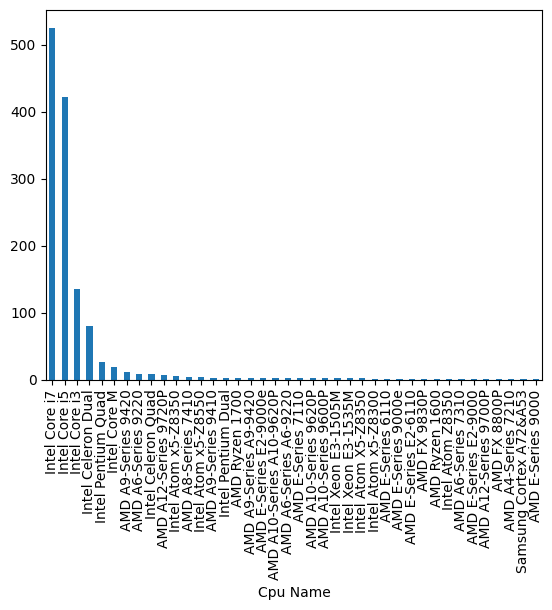

In [39]:
df['Cpu Name'].value_counts().plot(kind = 'bar')

In [40]:
# Marking CPU Brand from CPU Type
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3' or text == 'Intel Celeron Dual' or text == 'Intel Core M' or text == 'Intel Pentium Quad':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [41]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu Name,Cpu brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='Cpu brand'>

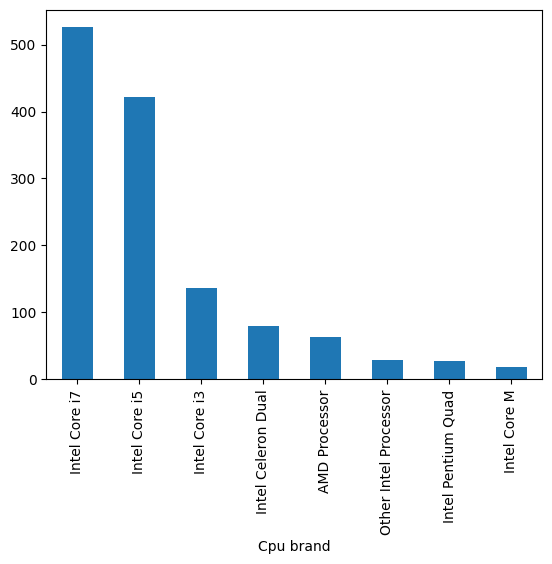

In [42]:
df['Cpu brand'].value_counts().plot(kind = 'bar')

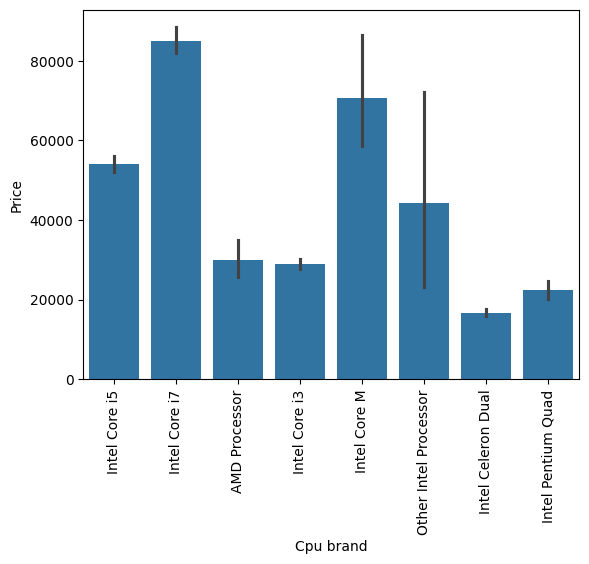

In [43]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Ram'>

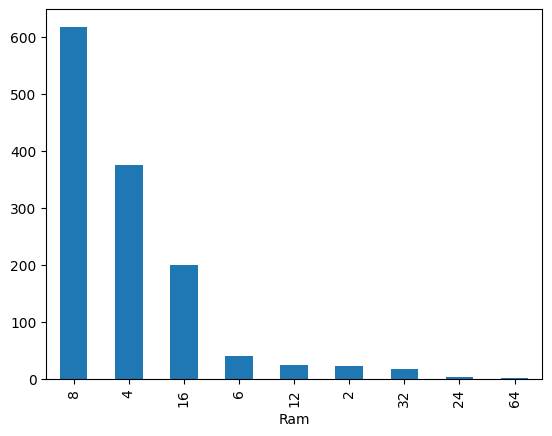

In [44]:
df['Ram'].value_counts().plot(kind = 'bar')

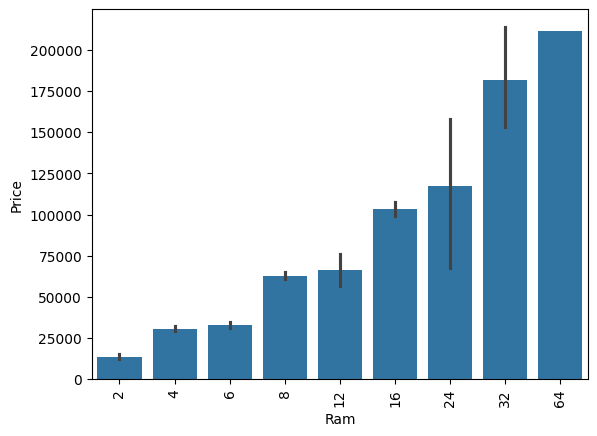

In [45]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
df['Memory'].value_counts()

Memory
256GB SSD                        411
1TB HDD                          223
500GB HDD                        132
512GB SSD                        117
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [47]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [48]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand
52,HP,Notebook,4,256GB SSD,AMD Radeon R4 Graphics,Windows 10,1.860,21231.5472,0,0,141.211998,AMD Processor
670,Microsoft,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.252,99519.0480,1,0,200.842560,Intel Core i7
38,HP,Notebook,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.860,26037.4032,0,0,100.454670,Intel Core i5
1011,HP,Ultrabook,4,500GB HDD,Intel HD Graphics 620,Windows 10,1.260,81997.9200,0,0,176.232574,Intel Core i5
353,HP,Workstation,8,256GB SSD,Nvidia Quadro M1200,Windows 10,2.600,92615.0256,0,0,141.211998,Intel Core i7
705,Dell,Notebook,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.180,42357.6000,0,0,141.211998,Intel Core i5
302,Lenovo,Notebook,6,1TB HDD,Nvidia GeForce GTX 940M,Windows 10,2.800,34578.7200,0,0,106.113062,Intel Core i5
528,Dell,Notebook,4,500GB HDD,AMD Radeon R5 M430,Windows 10,2.300,31168.8000,0,0,141.211998,Intel Core i5
506,Asus,Notebook,8,256GB SSD + 1TB HDD,Intel HD Graphics 620,Windows 10,2.000,65214.7200,0,0,141.211998,Intel Core i7
651,Acer,Gaming,8,1TB HDD,Nvidia GeForce GTX 1050,Linux,2.400,37775.5200,0,0,141.211998,Intel Core i5


In [49]:
df.loc[1247]

Company                           Asus
TypeName                        Gaming
Ram                                 16
Memory            256GB SSD +  1TB HDD
Gpu            Nvidia GeForce GTX 1070
OpSys                       Windows 10
Weight                            2.34
Price                         123876.0
Touchscreen                          0
IPS Panel                            1
ppi                         141.211998
Cpu brand                Intel Core i7
Name: 1247, dtype: object

In [50]:
# Changing TB to 1000 GB (in decimal input) or if it is in binary input then 1TB = 1024GB
df['Memory'] = df['Memory'].str.replace('GB', '')
df['Memory'] = df['Memory'].str.replace('TB', '000')
df['Memory'] = df['Memory'].str.replace('1.0000', '1')
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand
261,Lenovo,Notebook,4,256 SSD,Intel HD Graphics 520,No OS,2.20,23656.3200,0,0,141.211998,Intel Core i3
514,Xiaomi,Notebook,16,256 SSD,Nvidia GeForce MX150,No OS,1.95,74589.3360,0,1,141.211998,Intel Core i7
236,Acer,Notebook,4,1000 HDD,Intel HD Graphics 520,Linux,2.10,20779.2000,0,0,100.454670,Intel Core i3
422,HP,Notebook,8,256 SSD,Intel HD Graphics 630,Windows 10,2.31,76030.5600,0,0,141.211998,Intel Core i7
102,Dell,Notebook,8,1000 HDD,AMD Radeon 520,Linux,2.20,34472.1600,0,0,141.211998,Intel Core i5
108,MSI,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.20,69210.7200,0,0,141.211998,Intel Core i7
150,Dell,Gaming,16,512 SSD,Nvidia GeForce GTX 1050,Windows 10,2.56,66560.5728,0,0,141.211998,Intel Core i7
1174,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 940MX,No OS,2.20,37775.5200,0,0,141.211998,Intel Core i7
449,Microsoft,Ultrabook,16,512 SSD,Intel Iris Plus Graphics 640,Windows 10 S,1.25,137941.9200,1,0,200.842560,Intel Core i7
137,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,3.00,49976.6400,0,0,127.335675,Intel Core i5


In [51]:
df.isnull().sum()
df.shape

(1301, 12)

In [52]:
# Extracting types of memory drive if particular memory type founds then append size of memory else append 0 of other memory drive types

SSD = []
HDD = []
Flash = []
Hybrid = []

def memory_type_extractor(x):
    # Initialize flags and default values for each type
    ssd, hdd, flash, hybrid = 0, 0, 0, 0
    
    # Tokenize the input string
    tokens = [token for token in str(x).split() if token not in {'+', 'Storage'}]

    # Iterate through the tokens and extract values
    for i in range(len(tokens) - 1):
        if tokens[i+1] == 'SSD':
            ssd = int(tokens[i])
        elif tokens[i+1] == 'HDD':
            hdd = int(tokens[i])
        elif tokens[i+1] == 'Flash':
            flash = int(tokens[i])
        elif tokens[i+1] == 'Hybrid':
            hybrid = int(tokens[i])
    
    # Append the extracted values to the respective lists
    SSD.append(ssd)
    HDD.append(hdd)
    Flash.append(flash)
    Hybrid.append(hybrid)
    
df['Memory'].apply(memory_type_extractor)

# Check the length and content of each list
print('SSD:', len(SSD))
print('HDD:', len(HDD))
print('Flash:', len(Flash))
print('Hybrid:', len(Hybrid))

SSD: 1301
HDD: 1301
Flash: 1301
Hybrid: 1301


In [53]:
#Adding column to existing dataframe
df['SSD'] = SSD
df['HDD'] = HDD
df['Flash'] = Flash
df['Hybrid'] = Hybrid
df.shape

(1301, 16)

In [54]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,SSD,HDD,Flash,Hybrid
962,Acer,Notebook,12,128 SSD + 1000 HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,53759.52,0,0,141.211998,Intel Core i5,128,1000,0,0
775,Asus,2 in 1 Convertible,12,2000 HDD,Nvidia GeForce 940MX,Windows 10,2.30,44701.92,1,0,141.211998,Intel Core i7,0,2000,0,0
107,Asus,Ultrabook,8,256 SSD,Nvidia GeForce 940MX,Windows 10,1.30,63563.04,0,1,157.350512,Intel Core i7,256,0,0,0
160,Asus,Notebook,4,1000 HDD,AMD Radeon R5 M420,Windows 10,2.03,21471.84,0,0,100.454670,AMD Processor,0,1000,0,0
822,Lenovo,Ultrabook,8,512 SSD,Intel HD Graphics 620,Windows 10,1.13,133146.72,0,1,157.350512,Intel Core i7,512,0,0,0


In [55]:
df.drop(columns=['Memory'],inplace=True)
df.shape

(1301, 15)

In [56]:
df.corr(numeric_only = True)['Price']

Ram            0.743172
Weight         0.211744
Price          1.000000
Touchscreen    0.191555
IPS Panel      0.251684
ppi            0.473297
SSD            0.676386
HDD           -0.094235
Flash         -0.040418
Hybrid        -0.004751
Name: Price, dtype: float64

In [57]:
df.drop(columns=['Hybrid','Flash'], axis = 1, inplace=True)
df.shape

(1301, 13)

In [58]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,SSD,HDD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [59]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [60]:
df['Gpu'].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', 'Intel HD Graphics 400',
       'Nvidia GeForce GTX 1050', 'AMD Radeon R2', 'AMD Radeon 530',
       'Nvidia GeForce 930MX', 'Intel HD Graphics',
       'Intel HD Graphics 500', 'Nvidia GeForce 930MX ',
       'Nvidia GeForce GTX 1060', 'Nvidia GeForce 150MX',
       'Intel Iris Graphics 540', 'AMD Radeon RX 580',
       'Nvidia GeForce 920MX', 'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       'Nvid

In [61]:
# Extracting GPU Type by taking first two words from GPU column
def gpu_extractor(x):
    tokens = str(x).split(' ')
    return (tokens[0] + ' ' + tokens[1])

In [62]:
df['Gpu_type'] = df['Gpu'].apply(gpu_extractor)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,SSD,HDD,Gpu_type
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel Iris
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel HD
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel HD
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD Radeon
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel Iris


In [63]:
df['Gpu_type'].value_counts()

Gpu_type
Intel HD          637
Nvidia GeForce    368
AMD Radeon        173
Intel UHD          68
Nvidia Quadro      31
Intel Iris         14
AMD FirePro         5
AMD R4              1
AMD R17M-M1-70      1
Nvidia GTX          1
Intel Graphics      1
ARM Mali            1
Name: count, dtype: int64

In [64]:
value_counts = df['Gpu_type'].value_counts()

# Filter the DataFrame for rows where the count of 'Gpu_type' is less than or equal to 5
df = df[~df['Gpu_type'].isin(value_counts[value_counts <= 5].index)]
df.shape

(1291, 14)

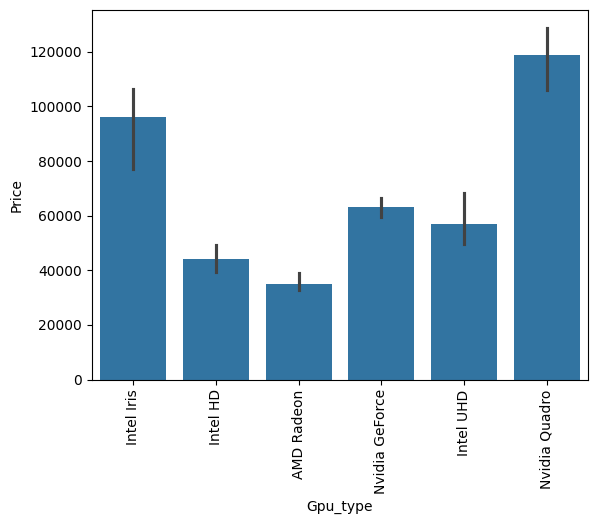

In [65]:
sns.barplot(x=df['Gpu_type'],y=df['Price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

In [66]:
df = df.drop(columns=['Gpu'], axis = 1)
df.shape

(1291, 13)

In [67]:
df['OpSys'].value_counts()

OpSys
Windows 10      1063
No OS             66
Linux             62
Windows 7         43
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [68]:
# Extracting type of Operating System (OS)
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others'

In [69]:
df['OS'] = df['OpSys'].apply(cat_os)

In [70]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,SSD,HDD,Gpu_type,OS
131,Dell,Notebook,4,Windows 10,2.20,23922.720,0,0,141.211998,Intel Core i3,0,1000,AMD Radeon,Windows
468,HP,Gaming,12,Windows 10,3.78,90522.720,0,1,127.335675,Intel Core i7,0,1000,Nvidia GeForce,Windows
449,Microsoft,Ultrabook,16,Windows 10 S,1.25,137941.920,1,0,200.842560,Intel Core i7,512,0,Intel Iris,Windows
808,Dell,Gaming,16,Windows 10,2.62,89457.120,0,0,282.423996,Intel Core i7,512,0,Nvidia GeForce,Windows
946,Dell,Ultrabook,8,Windows 10,1.36,78438.816,1,0,176.232574,Intel Core i5,256,0,Intel HD,Windows


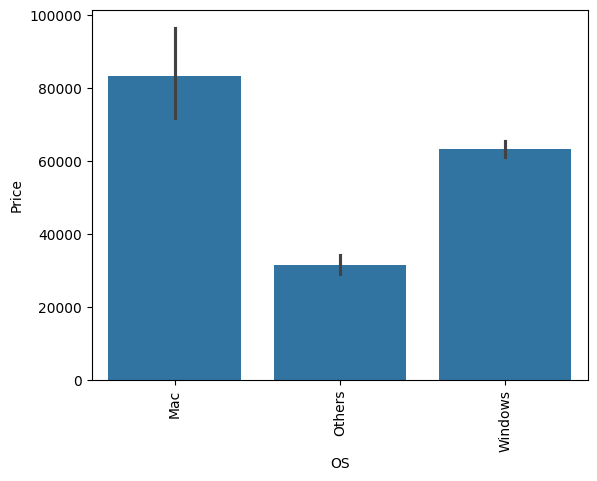

In [71]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
df.drop(columns=['OpSys'], axis = 1, inplace=True)

In [73]:
df.shape

(1291, 13)

C:\Users\HP\AppData\Local\Temp\ipykernel_156008\1125578356.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

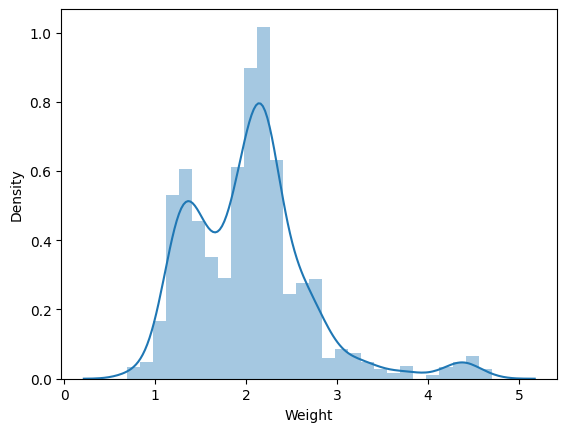

In [74]:
sns.distplot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

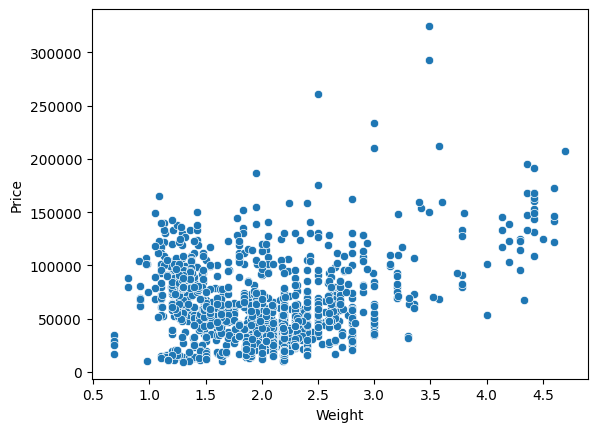

In [75]:
sns.scatterplot(x = df['Weight'], y = df['Price'])

In [76]:
df.corr(numeric_only = True)['Price']

Ram            0.744401
Weight         0.204246
Price          1.000000
Touchscreen    0.195801
IPS Panel      0.253132
ppi            0.479954
SSD            0.680600
HDD           -0.100178
Name: Price, dtype: float64

In [77]:
# Taking log of prices because distplot of price is swked which can reduce accuracy of model
# After taking log, graph is centred in below graph

log_prices = np.log(df['Price'])
log_prices

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: Price, Length: 1291, dtype: float64

C:\Users\HP\AppData\Local\Temp\ipykernel_156008\1572874224.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(log_prices)


<Axes: xlabel='Price', ylabel='Density'>

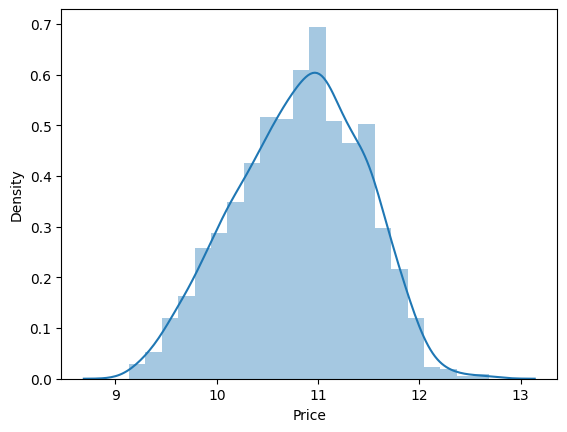

In [78]:
sns.distplot(log_prices)

In [79]:
X = df.drop('Price', axis = 1)
y = log_prices

In [80]:
X.shape

(1291, 12)

In [81]:
len(y)

1291

In [82]:
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS Panel,ppi,Cpu brand,SSD,HDD,Gpu_type,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel Iris,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel HD,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0,Intel HD,Others
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0,AMD Radeon,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0,Intel Iris,Mac


In [83]:
# Importing all preprocessing function

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [84]:
# Importing all type of model algorithm

from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor, StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsRegressor

In [85]:
# Transforming column which have non numeric values
step1 = ColumnTransformer(transformers = [
    ('non_numerical_column_transformation', OneHotEncoder(sparse_output = False, drop = 'first'), [0, 1, 7, 10, 11])
], remainder = 'passthrough')

In [86]:
step1

ColumnTransformer(remainder='passthrough',
                  transformers=[('non_numerical_column_transformation',
                                 OneHotEncoder(drop='first',
                                               sparse_output=False),
                                 [0, 1, 7, 10, 11])])

In [87]:
# Transforming values
X = step1.fit_transform(X)

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 22)

In [89]:
# This cell is for testing different types of model with different types of parameters
# But this cell is taking high computational cost and time
# So in below cells, Different models were tested individually

models = {
    'RandomForest': RandomForestRegressor(),
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'LogisticRegression': LogisticRegression(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'AdaBoostRegressor': AdaBoostRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'ExtraTreesRegressor': ExtraTreesRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'XGBRegressor': XGBRegressor(),
    'KNeighborsRegressor': KNeighborsRegressor()
}

param_grid_1 = {
    'RandomForest': {
        'model__n_estimators': [10, 50, 100, 150]
    },
    'LinearRegression': {
        'model__fit_intercept': [True, False]
    },
    'SVR': {
        'model__C': [0.1, 1, 10],
        'model__gamma': [0.01, 0.1, 1],
        'model__kernel': ['linear', 'rbf']
    }
}

param_grid_2 = {
    'LogisticRegression': {
        'model__C': [1, 5, 10 ,20]
    },
    'Lasso': {
        'model__alpha': [0.01, 0.1, 1, 10, 100],
        'model__max_iter': [1000, 5000]
    },
    'Ridge': {
        'model__alpha': [0.01, 0.1, 1, 10, 100],
        'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']
    }
}

param_grid_3 = {
    'DecisionTreeRegressor': {
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'AdaBoostRegressor': {
        'model__n_estimators': [None, 50, 100],
        'model__learning_rate': [0.01, 0.1, 1]
    },
    'BaggingRegressor': {
        'model__n_estimators': [10, 50, 100],
        'model__max_samples': [0.5, 0.75, 1.0]
    }
}

param_grid_4 = {
    'ExtraTreesRegressor': {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None, 10, 20, 30],
        'model__min_samples_split': [2, 5, 10]
    },
    'GradientBoostingRegressor': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    },
    'XGBRegressor': {
        'model__n_estimators': [50, 100, 200],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [3, 5, 7]
    }
}

param_grid_5 = {
    'KNeighborsRegressor': {
        'model__n_neighbors': [2, 3, 4, 5, 7, 8]
    }
}

In [91]:
model_lin = LinearRegression(fit_intercept = True)
model_lin.fit(X_train, y_train)
model_lin.score(X_test, y_test)

0.8828034577186338

In [92]:
model_lin = LinearRegression(fit_intercept = False)
model_lin.fit(X_train, y_train)
model_lin.score(X_test, y_test)

0.8828034577186432

In [93]:
model_lin = RandomForestRegressor(n_estimators = 200)
model_lin.fit(X_train, y_train)
model_lin.score(X_test, y_test)

0.8857373771244492

In [107]:
model_lin = Ridge(alpha = 0.1)
model_lin.fit(X_train, y_train)
model_lin.score(X_test, y_test)

0.8827964042749837

In [108]:
model_las = AdaBoostRegressor(n_estimators = 50, learning_rate = 0.1)
model_las.fit(X_train, y_train)
model_las.score(X_test, y_test)

0.770430159524425

In [109]:
model_las = AdaBoostRegressor(n_estimators = 100, learning_rate = 0.1)
model_las.fit(X_train, y_train)
model_las.score(X_test, y_test)

0.7895486605960135

In [110]:
model_las = AdaBoostRegressor(n_estimators = 50, learning_rate = 1)
model_las.fit(X_train, y_train)
model_las.score(X_test, y_test)

0.806923601020509

In [115]:
model_las = AdaBoostRegressor(n_estimators = 100, learning_rate = 2)
model_las.fit(X_train, y_train)
model_las.score(X_test, y_test)

0.8147830032816061

In [123]:
model_ada = BaggingRegressor(n_estimators = 100, max_samples = 0.7)
model_ada.fit(X_train, y_train)
model_ada.score(X_test, y_test)

0.889932940222084

In [125]:
model_ada = BaggingRegressor(n_estimators = 150, max_samples = 0.7)
model_ada.fit(X_train, y_train)
model_ada.score(X_test, y_test)

0.8856254815813264

In [141]:
model_bag_1 = KNeighborsRegressor(n_neighbors = 3)
model_bag_1.fit(X_train, y_train)
model_bag_1.score(X_test, y_test)

0.8489441609320552

In [168]:
model_xg = XGBRegressor(n_estimators = 50)
model_xg.fit(X_train,y_train)
model_xg.score(X_test, y_test)

0.8975373695324838

In [165]:
# Final Model
model_xg = XGBRegressor(n_estimators = 50)

#Pipeline used for automation for column onehotencoding, model defining and model training
model = Pipeline([
    ('step1',step1),
    ('step2',model_xg)
])

model.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('non_numerical_column_transformation',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  [0, 1, 7, 10, 11])])),
                ('step2',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_roun...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=50, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [166]:
model.score(X_test, y_test)

0.8975373695324838

In [164]:
import pickle

In [167]:
pickle.dump(model, open('laptop_price_predictor.pkl', 'wb'))
pickle.dump(df, open('laptop_price_prediction_columns_data.pkl', 'wb'))